In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
raw = pd.read_csv("train.csv")
print("Shape ", raw.shape)
raw.head()

Shape  (122265, 7)


row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1  1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2  1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3  1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4  1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   

   microbusiness_density  active  
0               3.007682    1249  
1               2.884870    1198  
2               3.055843    1269  
3               2.993233    1243  
4               2.993233    1243

In [ ]:
raw

row_id  cfips          county    state first_day_of_month  \
0        1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1        1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2        1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3        1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4        1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
...                  ...    ...             ...      ...                ...   
122260  56045_2022-06-01  56045   Weston County  Wyoming         2022-06-01   
122261  56045_2022-07-01  56045   Weston County  Wyoming         2022-07-01   
122262  56045_2022-08-01  56045   Weston County  Wyoming         2022-08-01   
122263  56045_2022-09-01  56045   Weston County  Wyoming         2022-09-01   
122264  56045_2022-10-01  56045   Weston County  Wyoming         2022-10-01   

        microbusiness_density  active  
0                    3.007682    1249  
1                    2.884870    1198  
2                    3.055843    1269  
3                    2.993233    1243  
4                    2.993233    1243  
...                       ...     ...  
122260               1.803249     101  
122261               1.803249     101  
122262               1.785395     100  
122263               1.785395     100  
122264               1.785395     100  

[122265 rows x 7 columns]

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
raw[['microbusiness_density', 'active']].describe()

microbusiness_density        active
count          122265.000000  1.222650e+05
mean                3.817671  6.442858e+03
std                 4.991087  3.304001e+04
min                 0.000000  0.000000e+00
25%                 1.639344  1.450000e+02
50%                 2.586543  4.880000e+02
75%                 4.519231  2.124000e+03
max               284.340030  1.167744e+06

In [ ]:
test_data = pd.read_csv("test.csv")
print("Shape ", test_data.shape)
test_data.head()

Shape  (25080, 3)


row_id  cfips first_day_of_month
0  1001_2022-11-01   1001         2022-11-01
1  1003_2022-11-01   1003         2022-11-01
2  1005_2022-11-01   1005         2022-11-01
3  1007_2022-11-01   1007         2022-11-01
4  1009_2022-11-01   1009         2022-11-01

In [ ]:
census_data = pd.read_csv("census_starter.csv")
print("Shape of the test data: ", census_data.shape)
census_data.head()

Shape of the test data:  (3142, 26)


pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  pct_bb_2021  cfips  \
0         76.6         78.9         80.6         82.7         85.5   1001   
1         74.5         78.1         81.8         85.1         87.9   1003   
2         57.2         60.4         60.5         64.6         64.6   1005   
3         62.0         66.1         69.2         76.1         74.6   1007   
4         65.8         68.5         73.0         79.6         81.0   1009   

   pct_college_2017  pct_college_2018  pct_college_2019  pct_college_2020  \
0              14.5              15.9              16.1              16.7   
1              20.4              20.7              21.0              20.2   
2               7.6               7.8               7.6               7.3   
3               8.1               7.6               6.5               7.4   
4               8.7               8.1               8.6               8.9   

   ...  pct_it_workers_2017  pct_it_workers_2018  pct_it_workers_2019  \
0  ...                  1.3                  1.1                  0.7   
1  ...                  1.4                  1.3                  1.4   
2  ...                  0.5                  0.3                  0.8   
3  ...                  1.2                  1.4                  1.6   
4  ...                  1.3                  1.4                  0.9   

   pct_it_workers_2020  pct_it_workers_2021  median_hh_inc_2017  \
0                  0.6                  1.1               55317   
1                  1.0                  1.3               52562   
2                  1.1                  0.8               33368   
3                  1.7                  2.1               43404   
4                  1.1                  0.9               47412   

   median_hh_inc_2018  median_hh_inc_2019  median_hh_inc_2020  \
0             58786.0               58731             57982.0   
1             55962.0               58320             61756.0   
2             34186.0               32525             34990.0   
3             45340.0               47542             51721.0   
4             48695.0               49358             48922.0   

   median_hh_inc_2021  
0             62660.0  
1             64346.0  
2             36422.0  
3             54277.0  
4             52830.0  

[5 rows x 26 columns]

In [ ]:
columns = census_data.columns
columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [ ]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [ ]:
census_data[census_data.isna().any(axis=1)]

pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  pct_bb_2021  cfips  \
92           80.5         79.1         80.4          NaN          NaN   2261   
1816         49.1         52.1         57.6         60.7         63.5  35039   
2644         66.3         66.6         61.2         63.2         70.1  48243   
2673         64.5         72.7         73.3         96.8         97.0  48301   

      pct_college_2017  pct_college_2018  pct_college_2019  pct_college_2020  \
92                23.1              19.0              16.5               NaN   
1816              12.0              12.5              12.6              10.6   
2644              18.4              16.0              10.8              14.3   
2673               4.7               0.0               0.0               0.0   

      ...  pct_it_workers_2017  pct_it_workers_2018  pct_it_workers_2019  \
92    ...                  3.3                  3.9                  5.3   
1816  ...                  0.8                  NaN                  0.8   
2644  ...                  0.0                  0.0                  0.0   
2673  ...                  0.0                  0.0                  0.0   

      pct_it_workers_2020  pct_it_workers_2021  median_hh_inc_2017  \
92                    NaN                  NaN               86019   
1816                  0.4                  0.7               33422   
2644                  0.0                  0.0               46534   
2673                  0.0                  0.0               80938   

      median_hh_inc_2018  median_hh_inc_2019  median_hh_inc_2020  \
92               82306.0               79867                 NaN   
1816                 NaN               39952             42264.0   
2644             53194.0               53088                 NaN   
2673             81875.0               83750             44076.0   

      median_hh_inc_2021  
92                   NaN  
1816             46994.0  
2644             38659.0  
2673                 NaN  

[4 rows x 26 columns]

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

census_data = pd.DataFrame(imp.fit_transform(census_data), columns=columns)
census_data = census_data.astype({'cfips': np.int64})

In [ ]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3142 non-null   float64
 4   pct_bb_2021            3142 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3142 non-null   float64
 10  pct_college_2021       3142 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3142 non-null   float64
 15  pct_

In [ ]:
print("Number of unique CFIPS in raw", raw["cfips"].nunique())
print("Number of unique counties names in raw", raw["county"].nunique())
print("Number of unique counties in test", test_data["cfips"].nunique())
print("Number of unique counties in census data", census_data["cfips"].nunique())

Number of unique CFIPS in raw 3135
Number of unique counties names in raw 1871
Number of unique counties in test 3135
Number of unique counties in census data 3142


In [ ]:
print("States in the training data", raw["state"].nunique())

States in the training data 51


In [ ]:
# Do we have train data for all the counties in the test data?
print(np.array_equal(raw.cfips.unique(), test_data.cfips.unique()))

# Do we have census data for all the counties in the training and in test data?
print(set(raw.cfips.unique()).issubset(set(census_data.cfips.unique())))
print(set(test_data.cfips.unique()).issubset(set(census_data.cfips.unique())))

True
True
True


In [ ]:
print(raw.cfips.value_counts()[:10])
assert np.all(raw.cfips.value_counts()==39)

1001     39
39133    39
39089    39
39091    39
39093    39
39095    39
39097    39
39099    39
39101    39
39103    39
Name: cfips, dtype: int64


In [ ]:
county_data = raw[['state', 'cfips']].drop_duplicates()
county_data.reset_index(drop=True, inplace=True)
county_data.state.value_counts().head()

Texas       254
Georgia     159
Virginia    130
Kentucky    120
Missouri    115
Name: state, dtype: int64

In [ ]:
raw.state.value_counts().head()

Texas       9906
Georgia     6201
Virginia    5070
Kentucky    4680
Missouri    4485
Name: state, dtype: int64

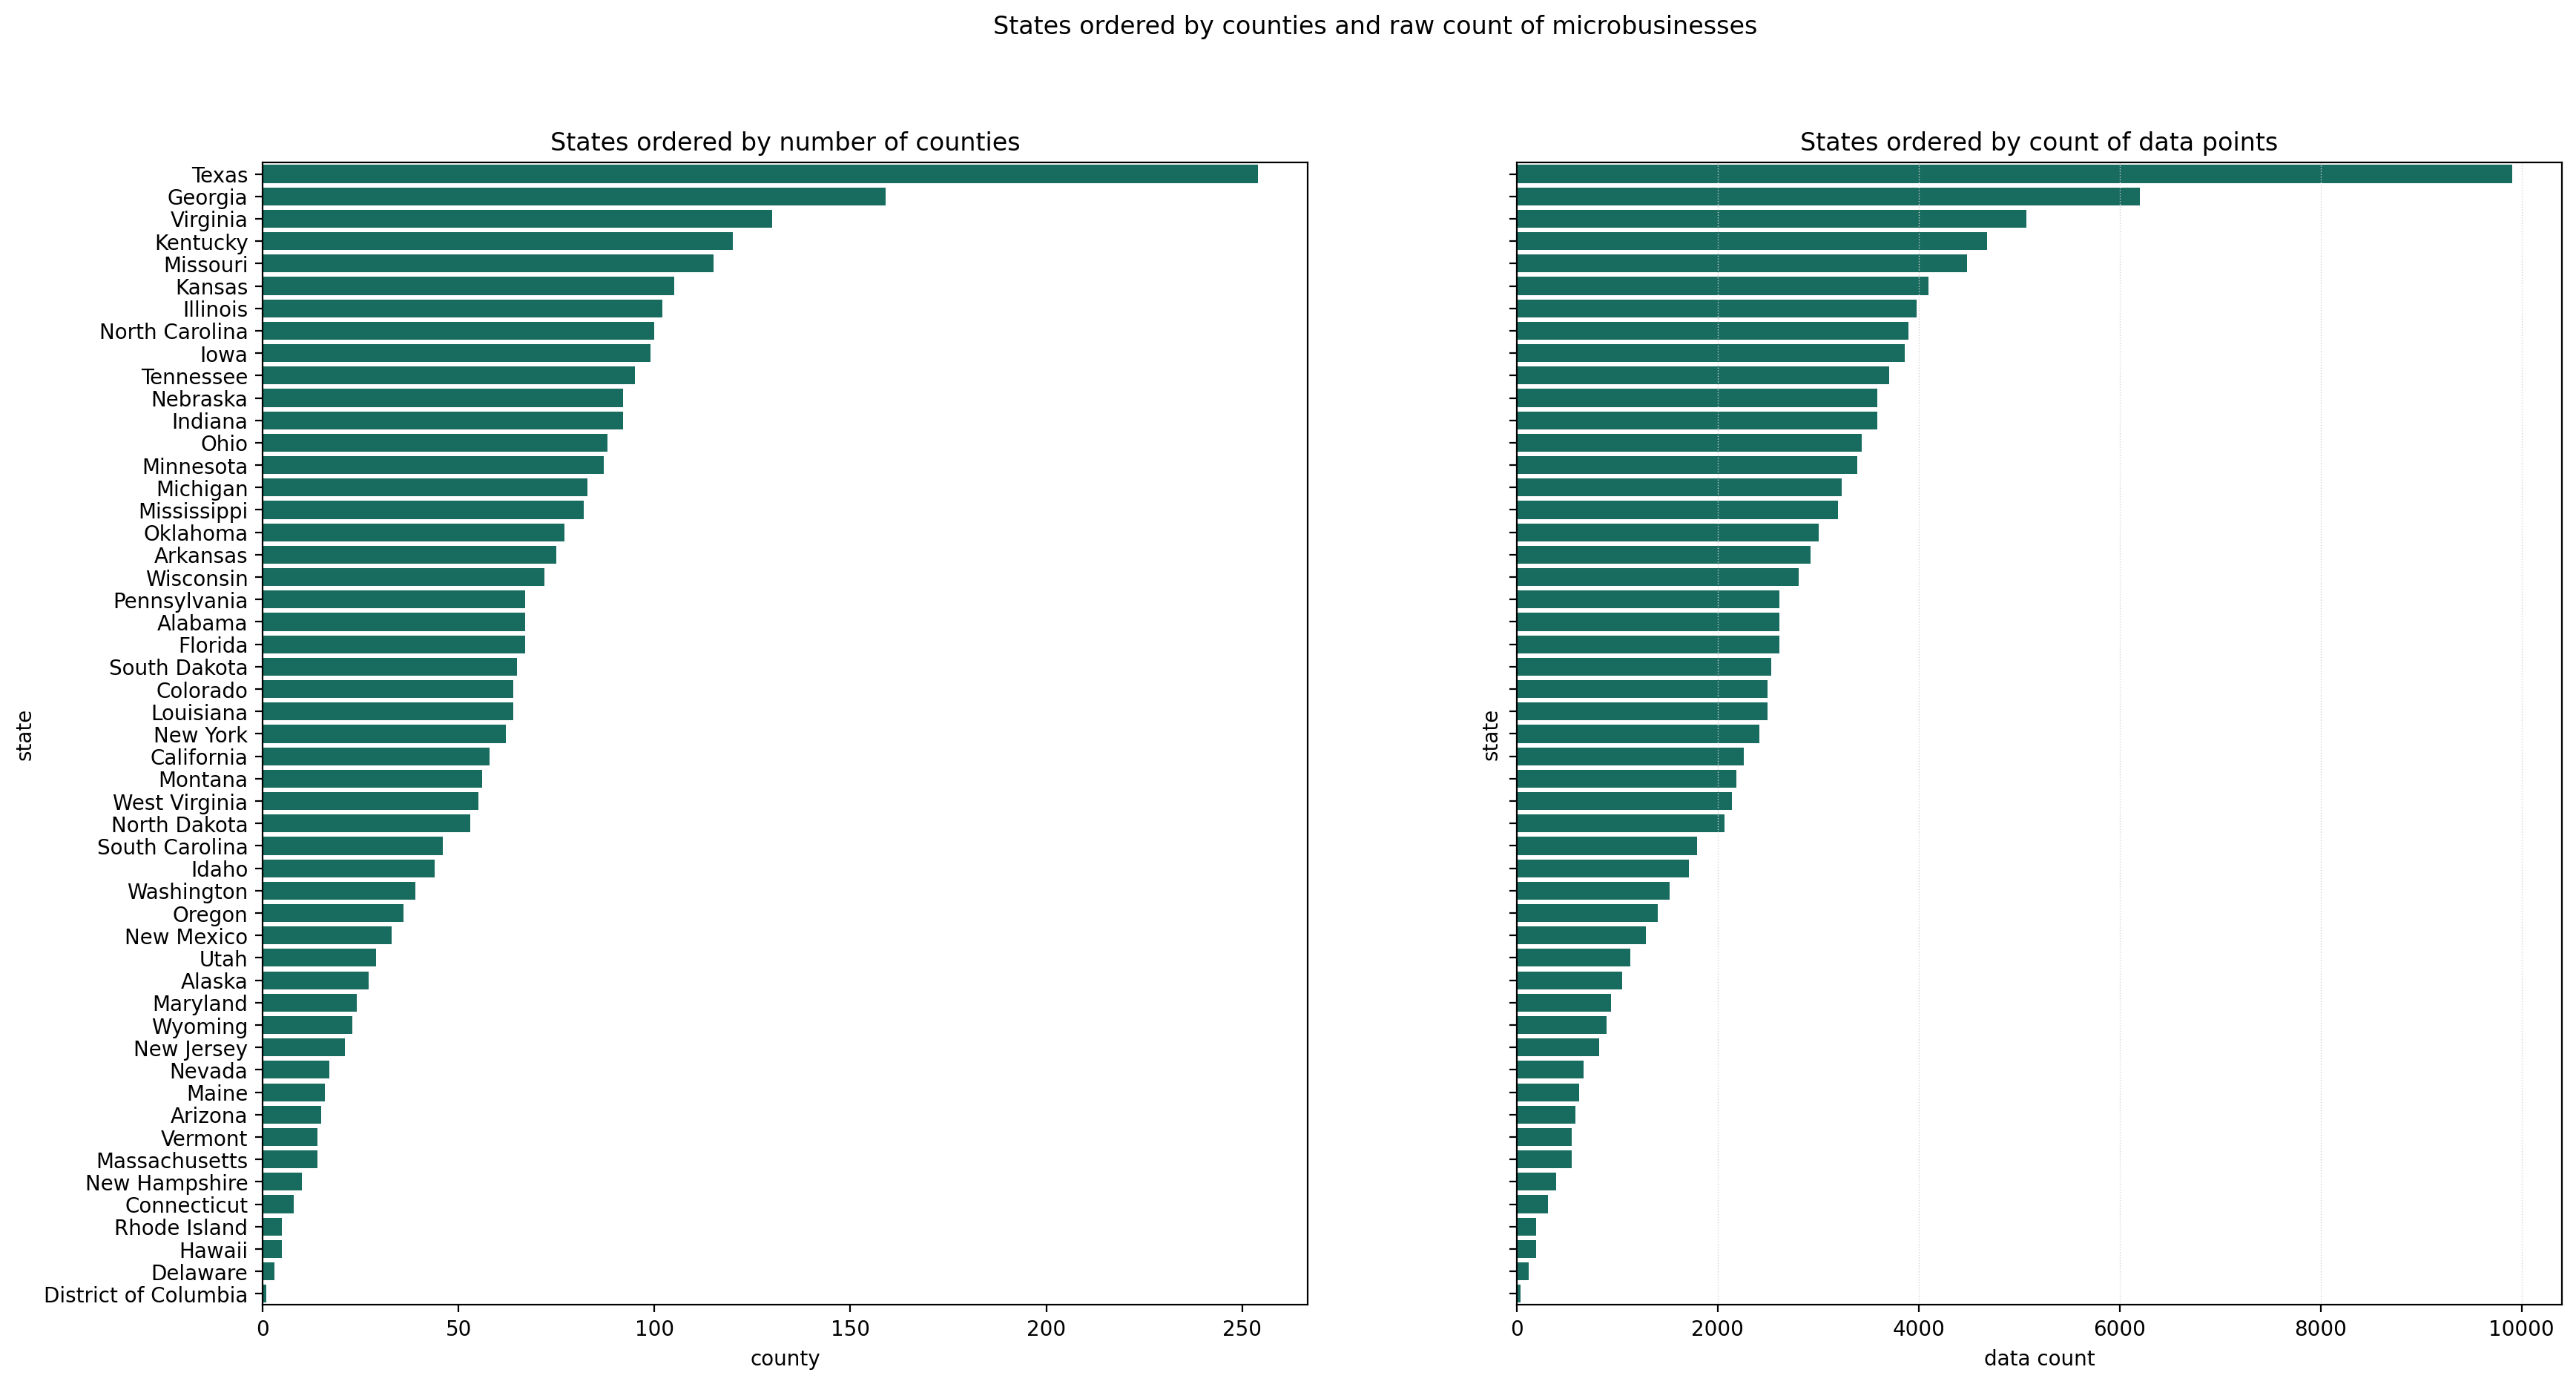

In [ ]:
fig, axes = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,10))
fig.suptitle('States ordered by counties and raw count of microbusinesses')
axes[0].set_title('States ordered by number of counties')
sns.countplot(county_data, ax=axes[0], y='state', order=county_data.state.value_counts().index, color='#097969')
axes[0].set_xlabel('county')
axes[1].set_title('States ordered by count of data points')
sns.countplot(raw, ax=axes[1], y='state', order=raw.state.value_counts().index, color='#097969')
axes[1].set_xlabel('data count')
plt.grid(visible=True, axis='x', color='lightgray', linewidth=0.5, linestyle=':')

In [ ]:
print("Number of months in the training data", raw.first_day_of_month.nunique())
print("Number of months in the test data", test_data.first_day_of_month.nunique())
print(f"Temporal range within the training data is from {raw.first_day_of_month.min()} to {raw.first_day_of_month.max()}")
print(f"Temporal range within the test data is from {test_data.first_day_of_month.min()} to {test_data.first_day_of_month.max()}")

Number of months in the training data 39
Number of months in the test data 8
Temporal range within the training data is from 2019-08-01 to 2022-10-01
Temporal range within the test data is from 2022-11-01 to 2023-06-01


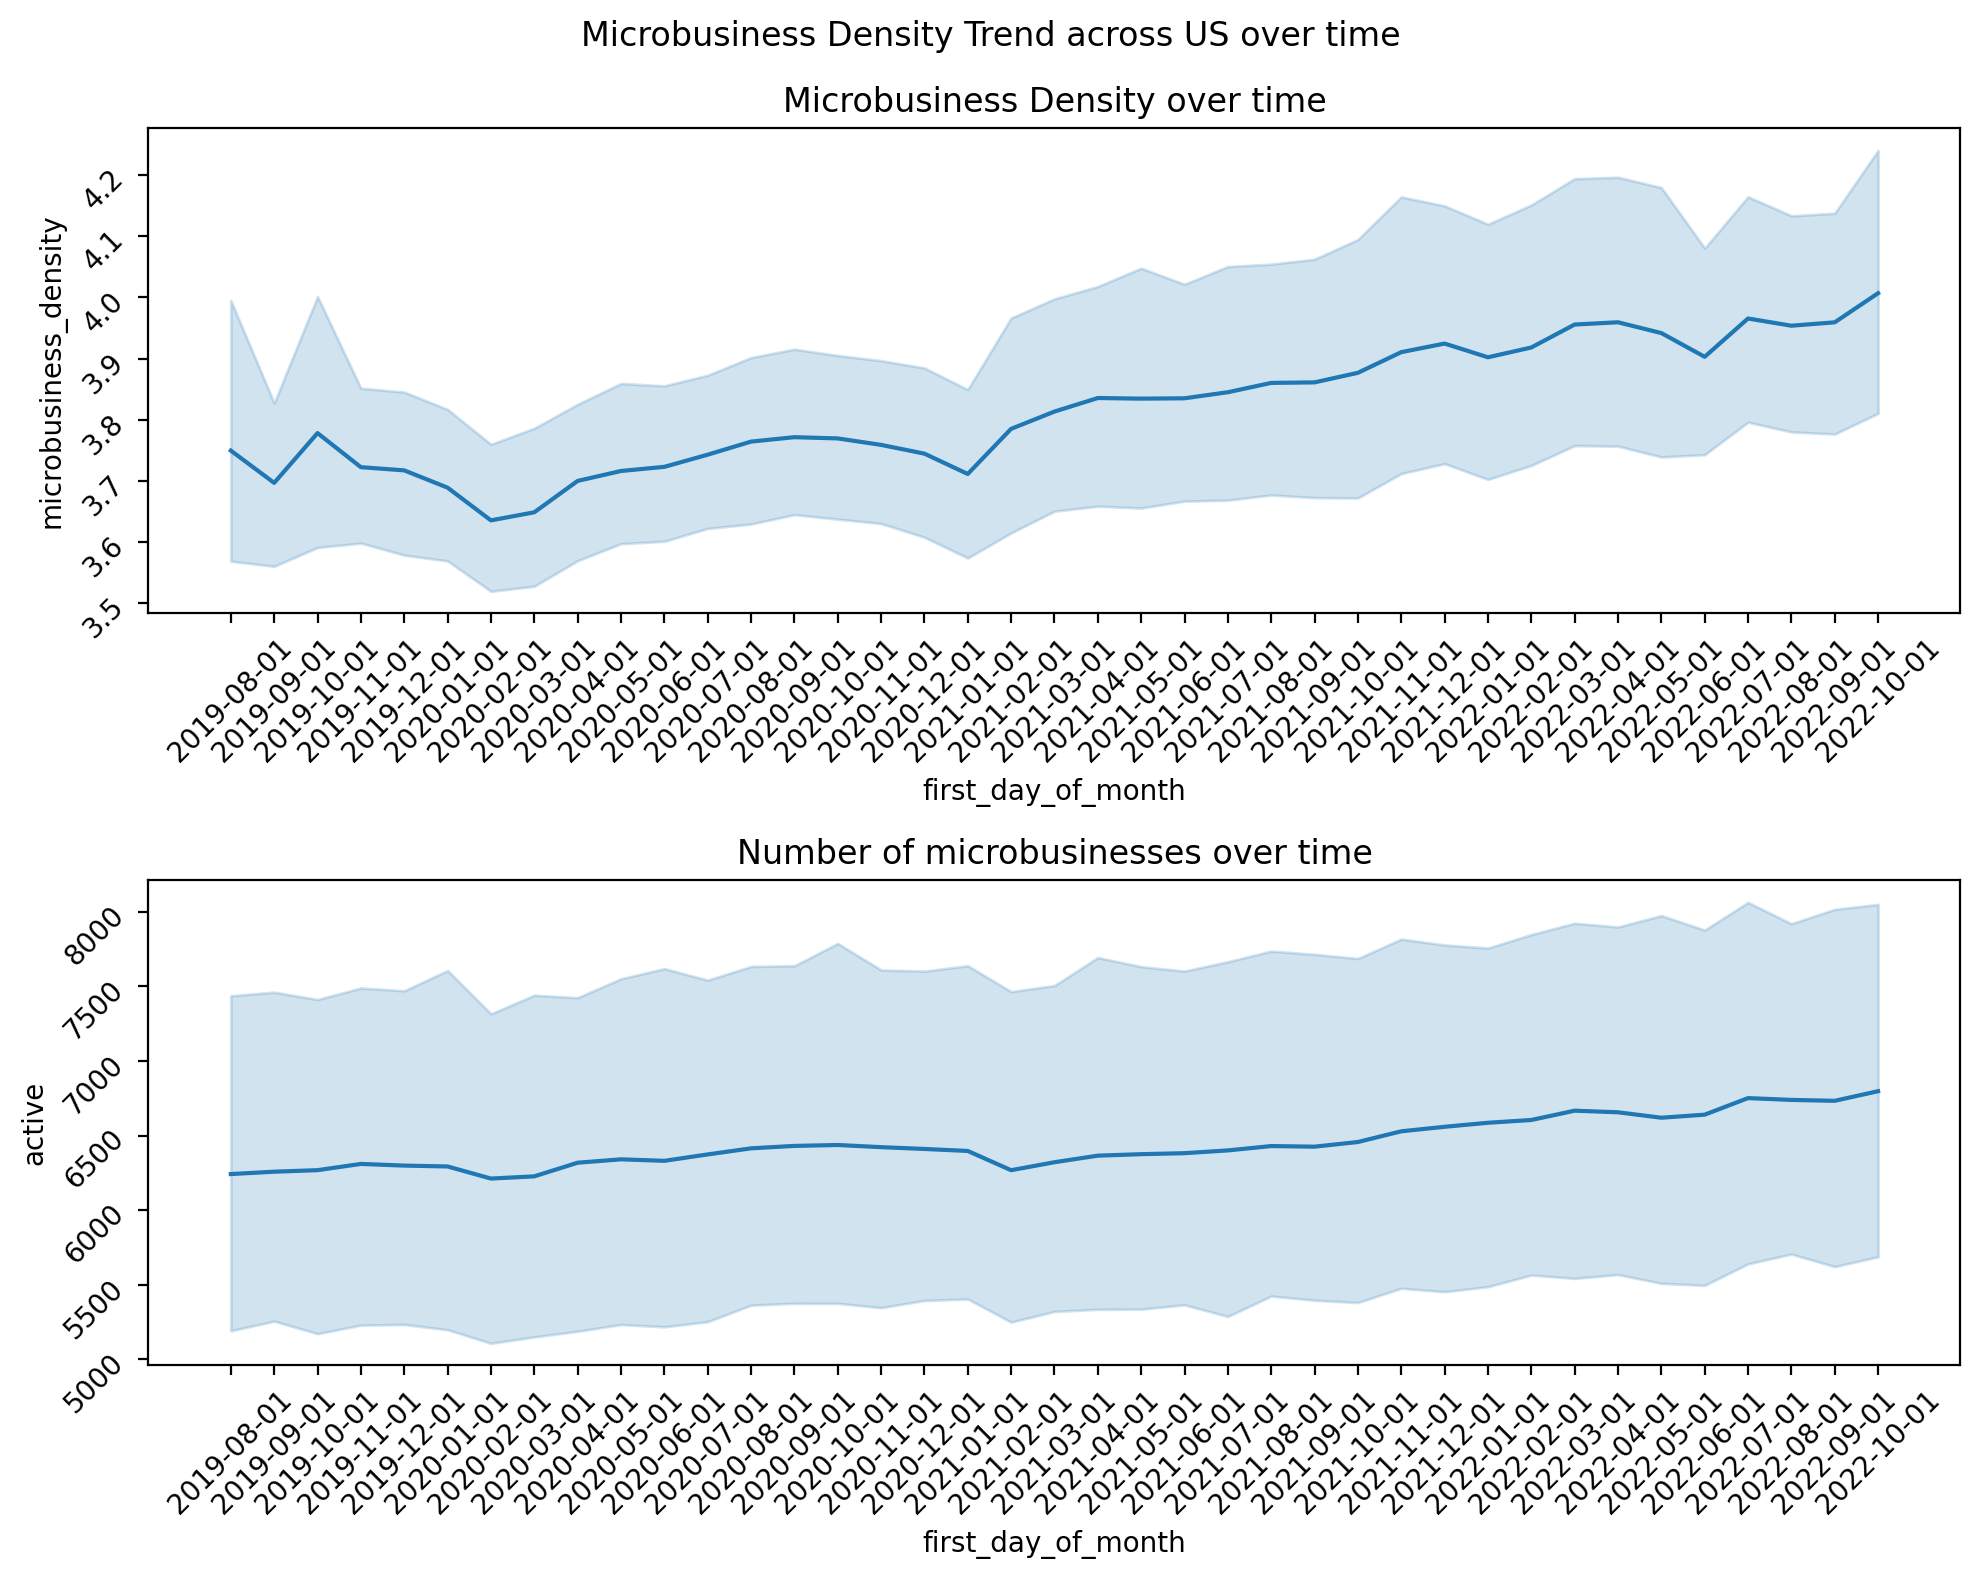

In [ ]:
fig, axes = plt.subplots(2,1, sharex=False, sharey=False, figsize=(10, 8))
fig.suptitle('Microbusiness Density Trend across US over time')
axes[0].set_title('Microbusiness Density over time')
axes[0].tick_params(labelrotation=45)
sns.lineplot(ax=axes[0], x=raw["first_day_of_month"], y=raw["microbusiness_density"])
axes[1].set_title('Number of microbusinesses over time')
axes[1].tick_params(labelrotation=45)
sns.lineplot(ax=axes[1], x=raw["first_day_of_month"], y=raw["active"])
fig.tight_layout()

In [ ]:
g = sns.relplot(data=raw, x='first_day_of_month', y='microbusiness_density', row='state', height=3, aspect=3.5, kind='line', facet_kws={'sharex':False, 'sharey': False})
g.tick_params(axis='x', labelrotation=45)
g.fig.tight_layout()

<Axes: xlabel='active', ylabel='microbusiness_density'>

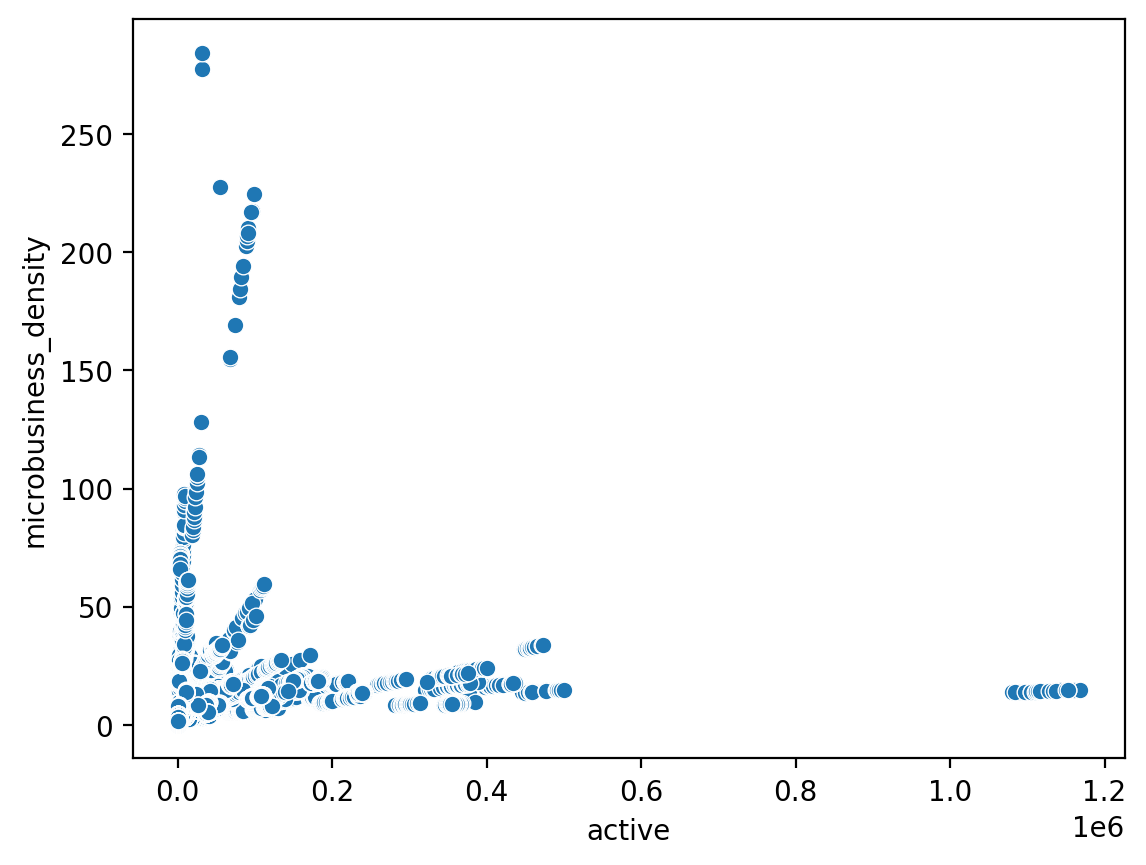

In [ ]:
sns.scatterplot(x='active', y='microbusiness_density', data=raw)

In [ ]:
from datetime import datetime

def get_year(date_str):
    # Get the year by parsing first_day_of_month field from each row.
    date = datetime.strptime(date_str,'%Y-%m-%d')
    return date.year

raw['year'] = raw.apply(lambda row: get_year(row.first_day_of_month), axis=1)
print("Total number of years: ", raw.year.nunique())
print("Total unique years", raw.year.unique())
raw.head()

Total number of years:  4
Total unique years [2019 2020 2021 2022]


row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1  1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2  1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3  1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4  1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   

   microbusiness_density  active  year  
0               3.007682    1249  2019  
1               2.884870    1198  2019  
2               3.055843    1269  2019  
3               2.993233    1243  2019  
4               2.993233    1243  2019

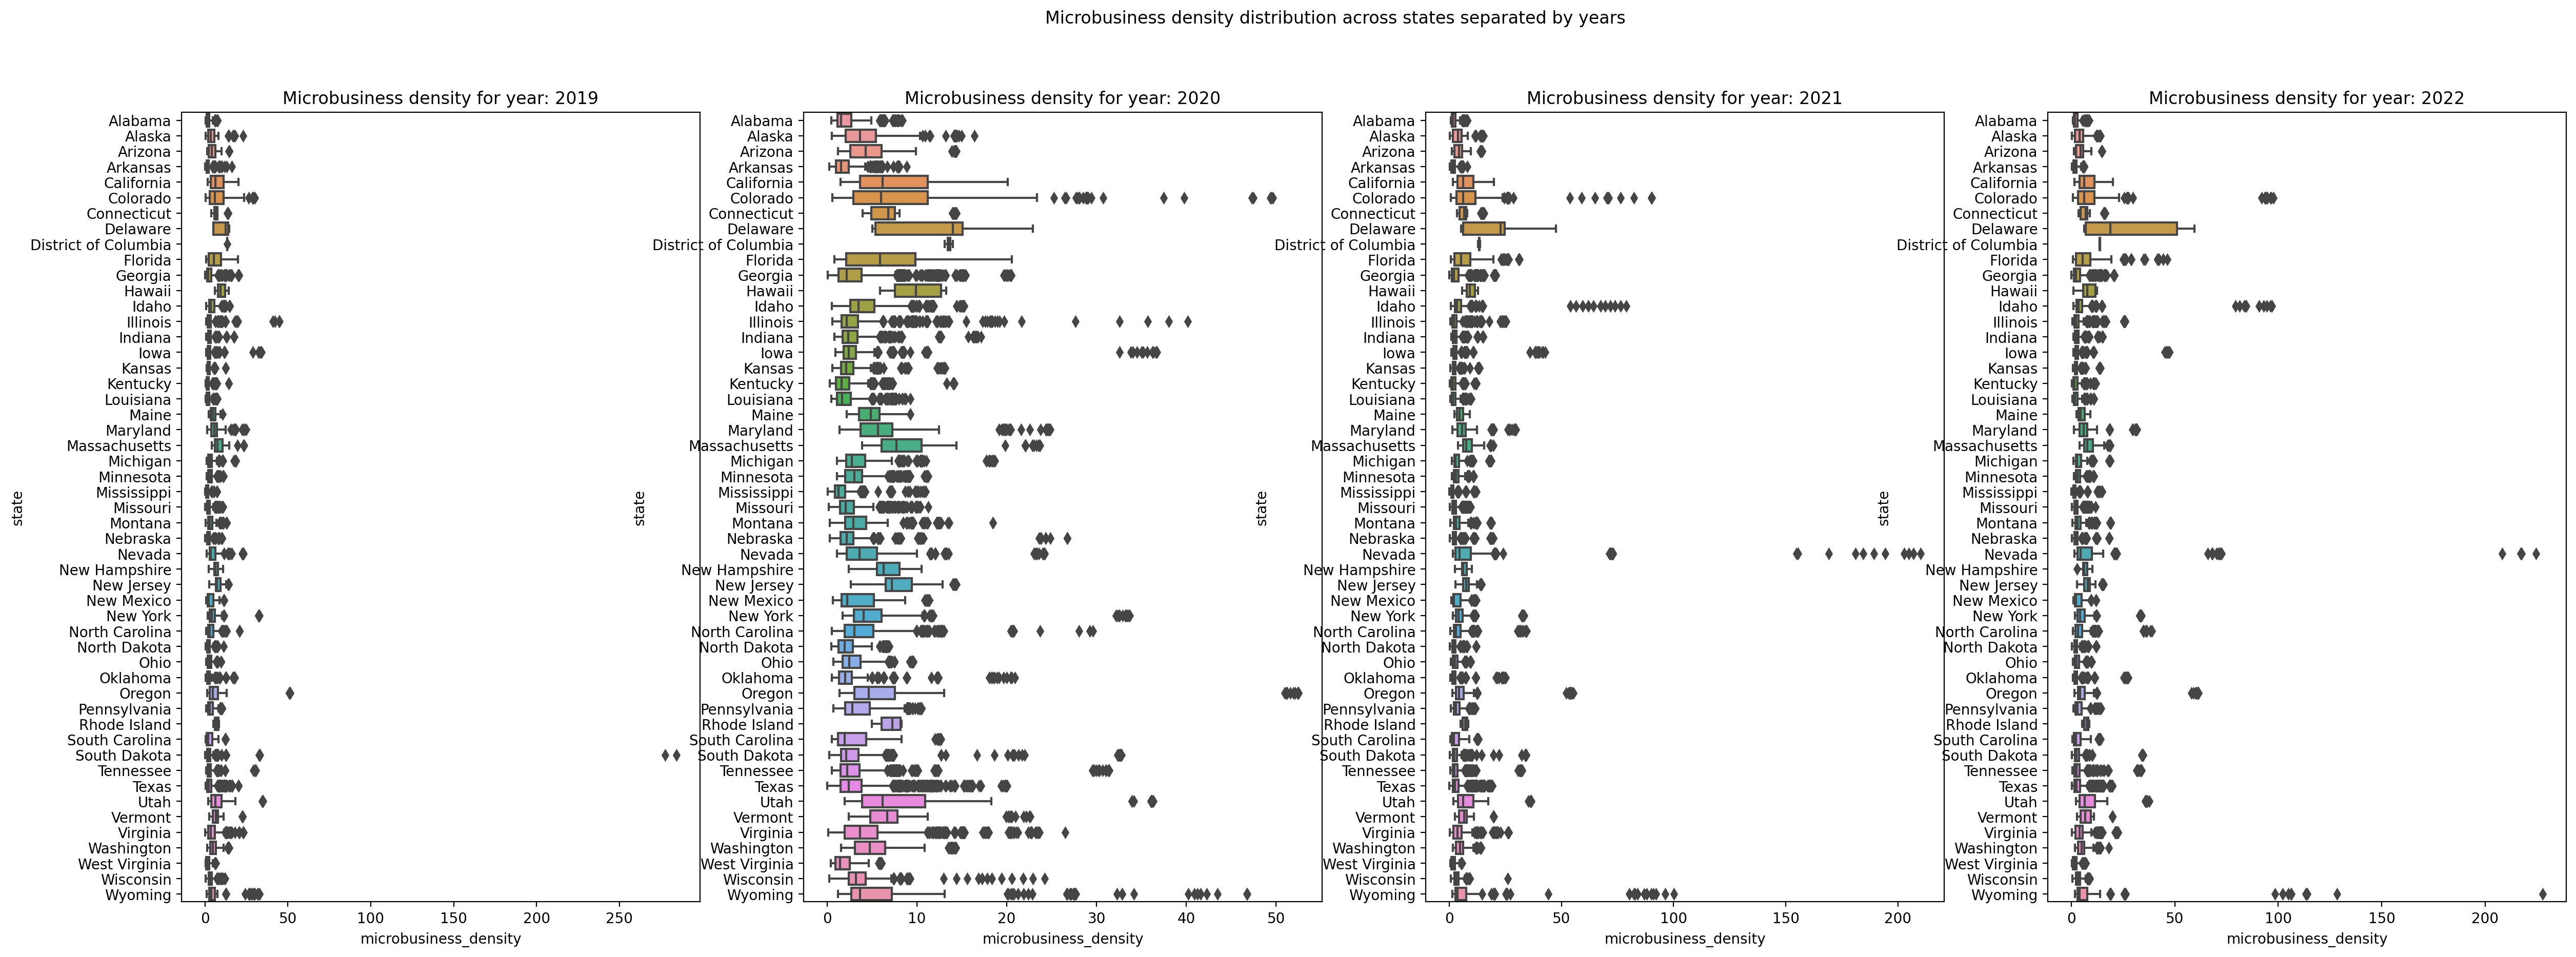

In [ ]:
fig, axes = plt.subplots(1, raw.year.nunique(), figsize=(30, 10))
fig.suptitle("Microbusiness density distribution across states separated by years")
years = raw.year.unique()

for idx, ax in enumerate(axes):
    data = raw[raw['year']==years[idx]]
    ax.set_title(f"Microbusiness density for year: {years[idx]}")
    sns.boxplot(ax=ax,y=data.state, x=data.microbusiness_density)

In [ ]:
def histplot_by_year(year):
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    data = raw[raw['year']==year]
    mean = data['microbusiness_density'].mean()
    median = data['microbusiness_density'].median()
    axes.set_title(f"Microbusiness density distribution for year: {year}")
    axes.axvline(mean, c='r', ls='--')
    axes.text(mean+0.5, 1000, f"mean: {mean:.2f}", c='r')
    axes.axvline(median, c='g', ls='--')
    axes.text(median+0.5, 500, f"median: {median:.2f}", c='g')
    sns.histplot(ax=axes, data=data.microbusiness_density, kde=True)

In [ ]:
years = raw.year.unique()
for yr in years:
    histplot_by_year(yr)

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
data = raw
mean = data['microbusiness_density'].mean()
median = data['microbusiness_density'].median()
axes.set_title(f"Microbusiness density distribution")
axes.axvline(mean, c='r', ls='--')
axes.text(mean+0.5, 1000, f"mean: {mean:.2f}", c='r')
axes.axvline(median, c='g', ls='--')
axes.text(median+0.5, 500, f"median: {median:.2f}", c='g')
sns.histplot(ax=axes, data=data.microbusiness_density, kde=True)

In [ ]:
columns = ['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']
raw[columns] = np.nan
raw.head()

In [ ]:
def census_featurizer():
    # Add census values to the data correcting for the two year lag
    years = raw.year.unique()
    for col in columns:
        for yr in years:
            census_col = f"{col}_{yr-2}"
            raw.loc[raw.year == yr, col] = raw[raw['year'] == yr].merge(census_data[[census_col, 'cfips']], on='cfips', how='inner')[census_col].to_list() # Set as list to get around indexing


census_featurizer()

In [ ]:
raw.pivot_table(index=['cfips','county', 'state', 'year'], values=columns+['microbusiness_density'], aggfunc='mean')

In [ ]:
corr_ = raw[columns+['microbusiness_density']].corr()
print(corr_)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_, cmap='coolwarm', square=True, annot=True)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# Function for SMAPE

def smape(forecast, actual):
    # Handle a single values
    forecast = np.array(forecast)
    actual = np.array(actual)

    n = forecast.size

    # Get indices for which both forecast and actual are zero
    i = (forecast==0) & (actual==0)

    return np.round(np.sum(np.abs(forecast[~i]-actual[~i])/(np.abs(actual[~i])+np.abs(forecast[~i])))*(200/n), 4)

# Run some assertions to check for correctness
assert smape(forecast=110, actual=100) == 9.5238
assert smape(forecast=90, actual=100) == 10.5263

In [ ]:
def mape(forecast, actual):
    # Handle single values
    forecast = np.array(forecast)
    actual = np.array(actual)

    n = forecast.size

    # Get the indices for which both forecast and actual are zero
    i = (forecast==0) & (actual==0)

    return np.round(np.sum(np.abs(actual[~i]-forecast[~i]/actual[~i]))*(100/n), 4)

print(mape(forecast=1000000, actual=100))  # MAPE is unbounded
print(smape(forecast=1000000, actual=100)) # SMAPE is always bounded between [0, 200]

In [ ]:
months = raw.first_day_of_month.unique()
train_months = months[0:27]
val_months = months[27:]
train_split = raw[raw.first_day_of_month.isin(train_months)].reset_index()
val_split = raw[raw.first_day_of_month.isin(val_months)].reset_index()

print(f"First month in train set: {train_months[0]}")
print(train_split.shape)
print(train_split.head())
print(train_split.index)
print(f"First month in validation set: {val_months[0]}")
print(val_split.shape)
print(val_split.head())
print(val_split.index)

In [ ]:
# Baseline as mean microbusiness density
average_mbd = train_split[['cfips', 'microbusiness_density']].groupby(by=['cfips']).mean()

In [ ]:
result = train_split.merge(average_mbd, on='cfips', how='inner')
display(result)
print(f"SMAPE value for average mbd on train set: {smape(result.microbusiness_density_y, result.microbusiness_density_x)}")
result = val_split.merge(average_mbd, on='cfips', how='inner')
print(f"SMAPE value for average mbd on validation set: {smape(result.microbusiness_density_y, result.microbusiness_density_x)}")

index            row_id  cfips          county    state  \
0           0   1001_2019-08-01   1001  Autauga County  Alabama   
1           1   1001_2019-09-01   1001  Autauga County  Alabama   
2           2   1001_2019-10-01   1001  Autauga County  Alabama   
3           3   1001_2019-11-01   1001  Autauga County  Alabama   
4           4   1001_2019-12-01   1001  Autauga County  Alabama   
...       ...               ...    ...             ...      ...   
84640  122248  56045_2021-06-01  56045   Weston County  Wyoming   
84641  122249  56045_2021-07-01  56045   Weston County  Wyoming   
84642  122250  56045_2021-08-01  56045   Weston County  Wyoming   
84643  122251  56045_2021-09-01  56045   Weston County  Wyoming   
84644  122252  56045_2021-10-01  56045   Weston County  Wyoming   

      first_day_of_month  microbusiness_density_x  active  year  pct_bb  \
0             2019-08-01                 3.007682    1249  2019    76.6   
1             2019-09-01                 2.884870    1198  2019    76.6   
2             2019-10-01                 3.055843    1269  2019    76.6   
3             2019-11-01                 2.993233    1243  2019    76.6   
4             2019-12-01                 2.993233    1243  2019    76.6   
...                  ...                      ...     ...   ...     ...   
84640         2021-06-01                 1.652596      92  2021    76.8   
84641         2021-07-01                 1.652596      92  2021    76.8   
84642         2021-08-01                 1.670559      93  2021    76.8   
84643         2021-09-01                 1.688522      94  2021    76.8   
84644         2021-10-01                 1.670559      93  2021    76.8   

       pct_college  pct_foreign_born  pct_it_workers  median_hh_inc  \
0             14.5               2.1             1.3        55317.0   
1             14.5               2.1             1.3        55317.0   
2             14.5               2.1             1.3        55317.0   
3             14.5               2.1             1.3        55317.0   
4             14.5               2.1             1.3        55317.0   
...            ...               ...             ...            ...   
84640         13.4               1.7             0.0        57031.0   
84641         13.4               1.7             0.0        57031.0   
84642         13.4               1.7             0.0        57031.0   
84643         13.4               1.7             0.0        57031.0   
84644         13.4               1.7             0.0        57031.0   

       microbusiness_density_y  
0                     3.055843  
1                     3.055843  
2                     3.055843  
3                     3.055843  
4                     3.055843  
...                        ...  
84640                 1.590706  
84641                 1.590706  
84642                 1.590706  
84643                 1.590706  
84644                 1.590706  

[84645 rows x 15 columns]

SMAPE value for average mbd on train set: 5.4041
SMAPE value for average mbd on validation set: 9.9815


In [ ]:
# Baseline as median microbusiness density
average_mbd = train_split[['cfips', 'microbusiness_density']].groupby(by=['cfips']).median()

In [ ]:
result = train_split.merge(average_mbd, on='cfips', how='inner')
print(f"SMAPE value for average mbd on train set: {smape(result.microbusiness_density_y, result.microbusiness_density_x)}")
result = val_split.merge(average_mbd, on='cfips', how='inner')
print(f"SMAPE value for average mbd on validation set: {smape(result.microbusiness_density_y, result.microbusiness_density_x)}")

SMAPE value for average mbd on train set: 5.4041
SMAPE value for average mbd on validation set: 9.9815


In [ ]:
raw[['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']].describe()

pct_bb    pct_college  pct_foreign_born  pct_it_workers  \
count  122265.000000  122265.000000     122265.000000   122265.000000   
mean       74.686369      14.220153          4.744932        1.355834   
std         9.374487       5.685812          5.711121        0.959998   
min        24.500000       0.000000          0.000000        0.000000   
25%        69.300000      10.100000          1.400000        0.700000   
50%        75.800000      13.200000          2.700000        1.200000   
75%        81.200000      17.300000          5.700000        1.800000   
max        97.100000      48.000000         54.000000       17.400000   

       median_hh_inc  
count  122265.000000  
mean    52832.408723  
std     14128.188631  
min     19264.000000  
25%     43512.000000  
50%     51098.000000  
75%     59230.000000  
max    147111.000000

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

features = ['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']
scaler = StandardScaler()
ordinary = LinearRegression()
lasso = Lasso()
ridge = Ridge()

X_train = scaler.fit_transform(train_split[features])
y_train = train_split['microbusiness_density']

X_val = scaler.fit_transform(val_split[features])
y_val = val_split['microbusiness_density']

In [ ]:
def run_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    print("SMAPE score val: ", smape(y_hat, y_val))
    y_hat = model.predict(X_train)
    print("SMAPE score train: ", smape(y_hat, y_train))

In [ ]:
run_model(ordinary, X_train, y_train, X_val, y_val)
run_model(lasso, X_train, y_train, X_val, y_val)
run_model(ridge, X_train, y_train, X_val, y_val)

SMAPE score val:  45.8212
SMAPE score train:  45.2208
SMAPE score val:  45.2223
SMAPE score train:  45.9375
SMAPE score val:  45.8208
SMAPE score train:  45.2205


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)

run_model(xgb, X_train, y_train, X_val, y_val)

SMAPE score val:  37.3339
SMAPE score train:  24.3384


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
run_model(dtr, X_train, y_train, X_val, y_val)

SMAPE score val:  42.8269
SMAPE score train:  2.8047


In [ ]:
def run_model_per_county(model, X_train, y_train, X_val, y_val):
    counties = train_split.cfips.unique()
    vscores = []
    tscores = []
    models = []
    for c in counties:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_val)
        vscores.append(smape(y_hat, y_val))
        y_hat = model.predict(X_train)
        tscores.append(smape(y_hat, y_train))
        models.append(model)
    return vscores, tscores, models

In [ ]:
vscores, tscores, models = run_model_per_county(ordinary, X_train, y_train, X_val, y_val)
print("Train score", np.mean(np.array(tscores)))
print("Train score", np.mean(np.array(vscores)))

Train score 45.2208
Train score 45.82119999999998


In [ ]:
vscores, tscores, models = run_model_per_county(lasso, X_train, y_train, X_val, y_val)
print("Train score", np.mean(np.array(tscores)))
print("Train score", np.mean(np.array(vscores)))

Train score 45.9375
Train score 45.22230000000001


In [ ]:
vscores, tscores, models = run_model_per_county(ridge, X_train, y_train, X_val, y_val)
print("Train score", np.mean(np.array(tscores)))
print("Train score", np.mean(np.array(vscores)))

Train score 45.22050000000001
Train score 45.82080000000001


In [ ]:
vscores, tscores, models = run_model_per_county(xgb, X_train, y_train, X_val, y_val)
print("Train score", np.mean(np.array(tscores)))
print("Train score", np.mean(np.array(vscores)))

KeyboardInterrupt: ignored

In [ ]:
vscores, tscores, models = run_model_per_county(dtr, X_train, y_train, X_val, y_val)
print("Train score", np.mean(np.array(tscores)))
print("Train score", np.mean(np.array(vscores)))

In [ ]:
county = 1001
train = train_split[train_split.cfips==county][['first_day_of_month', 'microbusiness_density']].set_index('first_day_of_month')
test = val_split[val_split.cfips==county][['first_day_of_month', 'microbusiness_density']].set_index('first_day_of_month')
print(train)
print(test)

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
# Moving Averages
def arima(order):
    global counties
    counties = train_split.cfips.unique()
    scores = []
    models = []
    for c in counties:
        train = train_split[train_split.cfips==c][['first_day_of_month', 'microbusiness_density']].set_index('first_day_of_month')
        test = val_split[val_split.cfips==c][['first_day_of_month', 'microbusiness_density']].set_index('first_day_of_month')
        model = ARIMA(train.microbusiness_density.values, order=order).fit()
        y_hat = model.predict(len(train), len(train)+len(test)-1)
        scores.append(smape(y_hat, test.microbusiness_density.values))
        models.append(model)
    return scores, models

In [ ]:
scores, models = arima(order=(5,1,0))
np.mean(np.array(scores))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/l

4.864209377990431

In [ ]:
kcounties = train_split.cfips.unique()
for c, mdl in zip(kcounties, models):
    test_data.loc[test_data.cfips==c, 'microbusiness_density'] = mdl.predict(39, 39+8-1) # We know test set contains only 8 months

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   row_id                 25080 non-null  object 
 1   cfips                  25080 non-null  int64  
 2   first_day_of_month     25080 non-null  object 
 3   microbusiness_density  25080 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 783.9+ KB


In [ ]:
test_data[['row_id', 'microbusiness_density']].to_csv('submission.csv', index=False)

In [ ]:
test_data

row_id  cfips first_day_of_month  microbusiness_density
0       1001_2022-11-01   1001         2022-11-01               3.203062
1       1003_2022-11-01   1003         2022-11-01               7.868515
2       1005_2022-11-01   1005         2022-11-01               1.130743
3       1007_2022-11-01   1007         2022-11-01               1.148998
4       1009_2022-11-01   1009         2022-11-01               1.732969
...                 ...    ...                ...                    ...
25075  56037_2023-06-01  56037         2023-06-01               3.126203
25076  56039_2023-06-01  56039         2023-06-01              25.657417
25077  56041_2023-06-01  56041         2023-06-01               3.507021
25078  56043_2023-06-01  56043         2023-06-01               3.135960
25079  56045_2023-06-01  56045         2023-06-01               1.665575

[25080 rows x 4 columns]